2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

data.head()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Text(0, 0.5, 'Count')

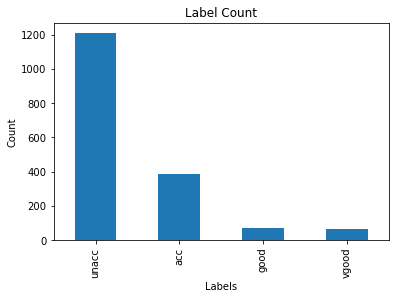

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = data['class'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [14]:
data['safety'].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
data['buying'] = label_encoder.fit_transform(data['buying'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
data['maint'] = label_encoder.fit_transform(data['maint'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
data['safety'] = label_encoder.fit_transform(data['safety'])

label_encoder = LabelEncoder()
data['doors'] = label_encoder.fit_transform(data['doors'])

label_encoder = LabelEncoder()
data['persons'] = label_encoder.fit_transform(data['persons'])

In [26]:
data['persons'].value_counts()

0    576
1    576
2    576
Name: persons, dtype: int64

In [28]:
# 데이터 분할
X=data.drop('class',axis=1)
y=data['class']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

y_test

1318    unacc
124     unacc
648     unacc
249     unacc
1599    unacc
        ...  
960     unacc
814     unacc
752       acc
744     unacc
1070      acc
Name: class, Length: 432, dtype: object

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9745370370370371
[[ 95   3   1   0]
 [  2  19   0   0]
 [  3   0 293   0]
 [  2   0   0  14]]


In [33]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6550925925925926
[[ 11   0  84   4]
 [  1   0  20   0]
 [ 24   0 269   3]
 [  4   0   9   3]]


In [34]:
#Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


In [37]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         acc       0.93      0.96      0.95        99
        good       0.86      0.90      0.88        21
       unacc       1.00      0.99      0.99       296
       vgood       1.00      0.88      0.93        16

    accuracy                           0.97       432
   macro avg       0.95      0.93      0.94       432
weighted avg       0.98      0.97      0.97       432

[[ 95   3   1   0]
 [  2  19   0   0]
 [  3   0 293   0]
 [  2   0   0  14]]


In [38]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

              precision    recall  f1-score   support

         acc       0.28      0.11      0.16        99
        good       0.00      0.00      0.00        21
       unacc       0.70      0.91      0.79       296
       vgood       0.30      0.19      0.23        16

    accuracy                           0.66       432
   macro avg       0.32      0.30      0.30       432
weighted avg       0.56      0.66      0.59       432

[[ 11   0  84   4]
 [  1   0  20   0]
 [ 24   0 269   3]
 [  4   0   9   3]]


In [39]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

              precision    recall  f1-score   support

         acc       0.97      0.93      0.95        99
        good       0.84      1.00      0.91        21
       unacc       0.99      0.99      0.99       296
       vgood       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432

[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]
